In [16]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
root = '/Users/julianalverio/code/hmmlearn/training_utils/pickup_dataset'

In [18]:
all_videos = list()
all_video_paths = [path for path in os.listdir(root) if path.endswith('.pkl')]
for video_path in all_video_paths:
    full_video_path = os.path.join(root, video_path)
    with open(full_video_path, 'rb') as f:
        video = pickle.load(f)
    video = np.array(video)
    all_videos.append(video)

In [19]:
x_distances = list()
y_distances = list()
z_distances = list()
finger_widths = list()
object_heights = list()
block_vertical_velocities = list()
relative_x_velocities = list()
relative_y_velocities = list()
relative_z_velocities = list()
for video in all_videos:
    for frame in video:
        x_distance, y_distance, z_distance = frame['distances']
        finger_width = frame['finger_width']
        object_height = frame['object_position'][2] - 0.42475143503939244
        block_vertical_velocity = frame['object_relative_velocity'][2]
        relative_x_velocity, relative_y_velocity, relative_z_velocity = frame['object_relative_velocity']
        
        x_distances.append(x_distance)
        y_distances.append(y_distance)
        z_distances.append(z_distance)
        finger_widths.append(finger_width)
        object_heights.append(object_height)
        block_vertical_velocities.append(block_vertical_velocity)
        relative_x_velocities.append(relative_x_velocity)
        relative_y_velocities.append(relative_y_velocity)
        relative_z_velocities.append(relative_z_velocity)
        

In [20]:
# https://en.wikipedia.org/wiki/Generalised_logistic_function
# beta affects how steep the curve is
# Q will shift things left and right
def sigmoid(x, q, beta):
    denominator = (1 + q*np.exp(-beta*x))
    return 1 / denominator

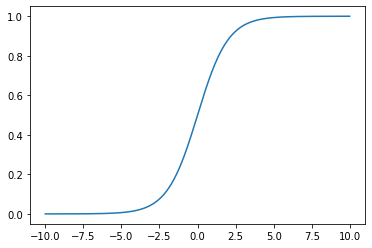

In [21]:
x = np.arange(-10, 10, 0.01)
y = sigmoid(x, 1, 1)
plt.plot(x, y)

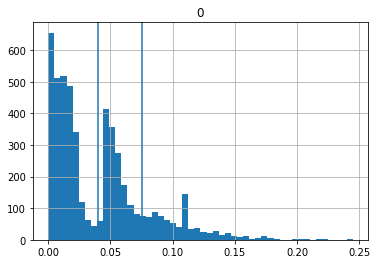

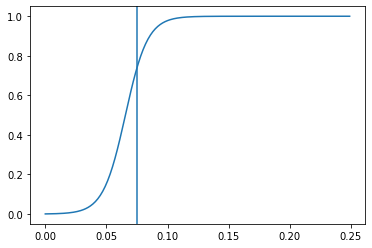

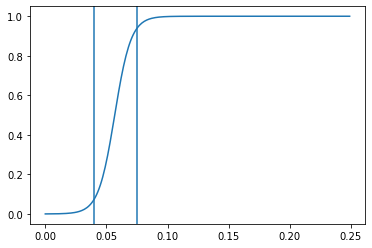

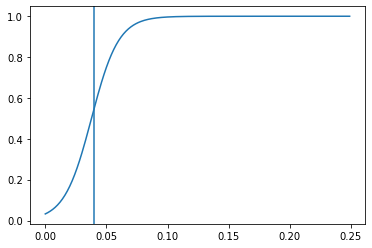

In [22]:
# x_distances

pd.DataFrame(x_distances).hist(bins=50)
plt.axvline(x=0.04)
plt.axvline(x=0.075)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=1350, beta=110)
plt.plot(x, y)
plt.axvline(x=0.075)
plt.show()


# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=5000, beta=150)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.axvline(x=0.075)
plt.show()


# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=30, beta=90)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.show()



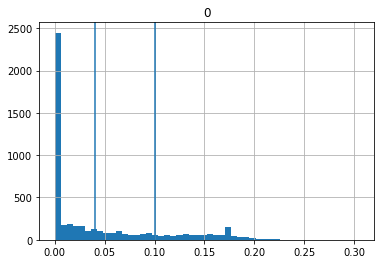

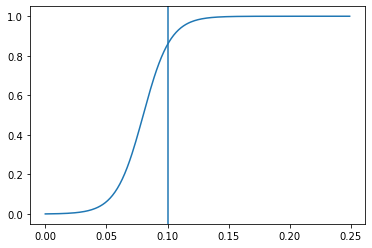

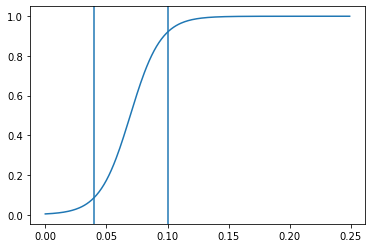

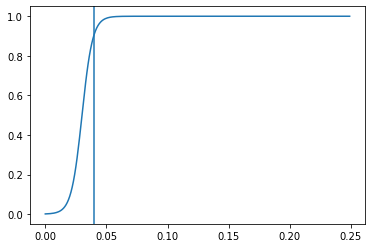

In [23]:
# y_distances

pd.DataFrame(y_distances).hist(bins=50)
plt.axvline(x=0.04)
plt.axvline(x=0.1)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=1350, beta=90)
plt.plot(x, y)
plt.axvline(x=0.1)
plt.show()


# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=260, beta=80)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.axvline(x=0.1)
plt.show()


# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=1000, beta=230)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.show()



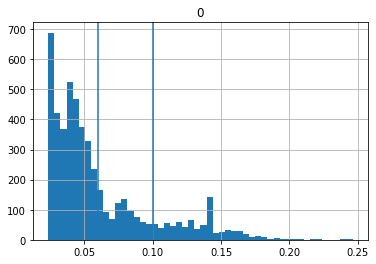

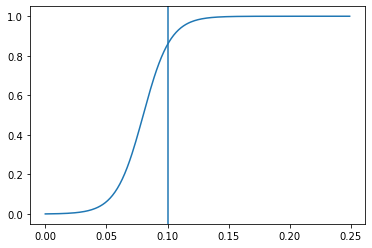

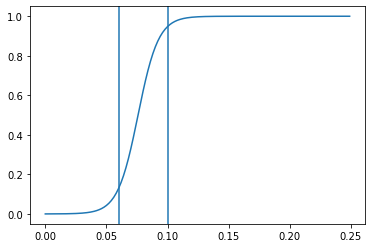

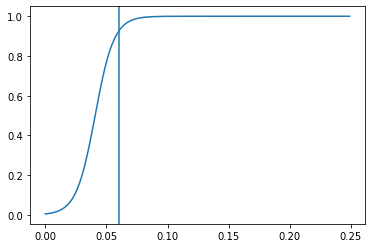

In [24]:
# z_distances

pd.DataFrame(z_distances).hist(bins=50)
plt.axvline(x=0.06)
plt.axvline(x=0.1)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=1350, beta=90)
plt.plot(x, y)
plt.axvline(x=0.1)
plt.show()


# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=9000, beta=120)
plt.plot(x, y)
plt.axvline(x=0.06)
plt.axvline(x=0.1)
plt.show()


# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=200, beta=130)
plt.plot(x, y)
plt.axvline(x=0.06)
plt.show()



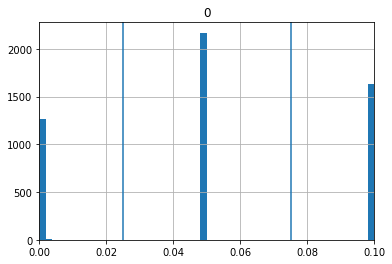

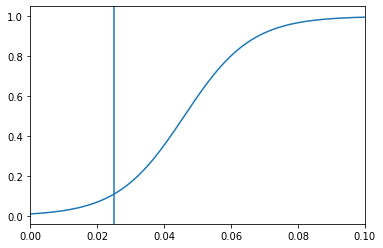

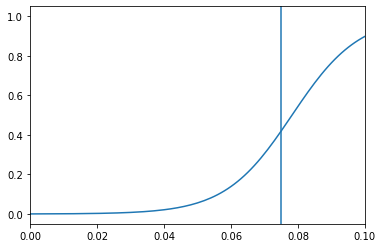

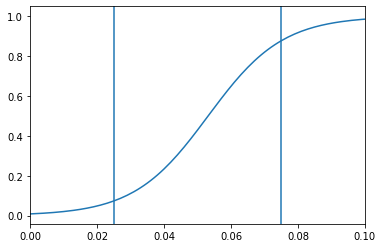

In [25]:
# finger_widths

pd.DataFrame(finger_widths).hist(bins=50)
plt.axvline(x=0.025)
plt.axvline(x=0.075)
plt.xlim(0, 0.1)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.axvline(x=0.025)
plt.show()


# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=2500, beta=100)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.axvline(x=0.075)
plt.show()


# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=120, beta=90)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.axvline(x=0.025)
plt.axvline(x=0.075)
plt.show()



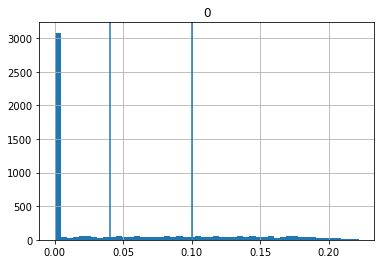

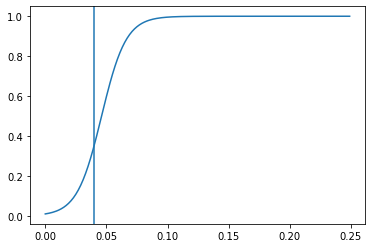

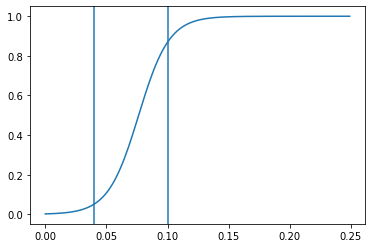

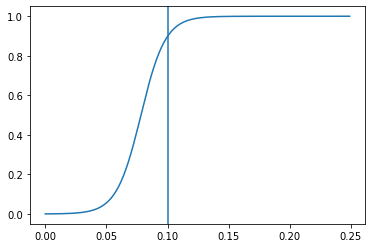

In [26]:
# object_heights

pd.DataFrame(object_heights).hist(bins=50)
plt.axvline(x=0.04)
plt.axvline(x=0.1)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.show()

# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=450, beta=80)
plt.plot(x, y)
plt.axvline(x=0.04)
plt.axvline(x=0.1)
plt.show()

# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=2500, beta=100)
plt.plot(x, y)
plt.axvline(x=0.1)
plt.show()



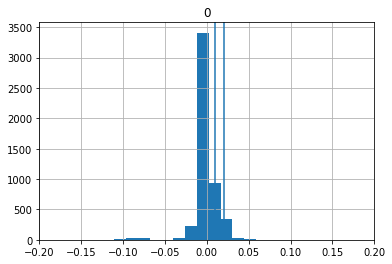

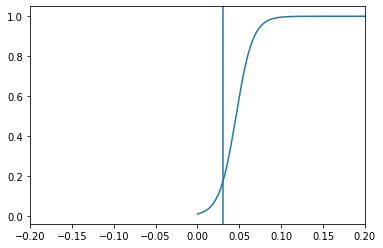

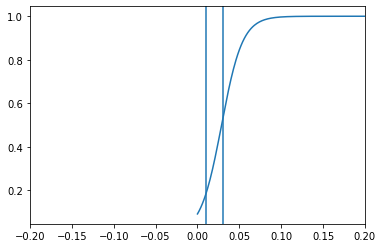

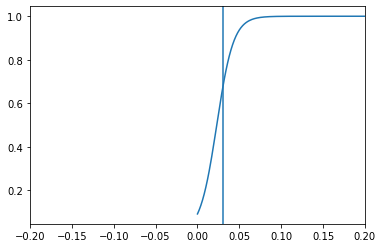

In [27]:
# block_vertical_velocities

pd.DataFrame(block_vertical_velocities).hist(bins=50)
plt.axvline(x=0.01)
plt.axvline(x=0.02)
plt.xlim(-0.2, 0.2)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=80)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.01)
plt.axvline(x=0.03)
plt.show()

# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

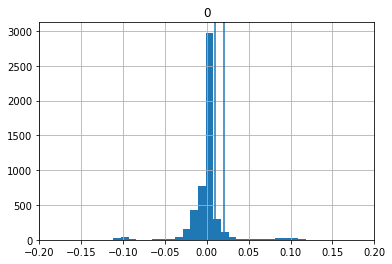

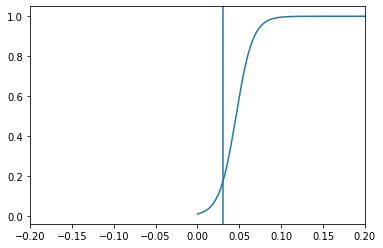

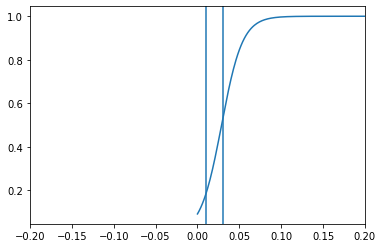

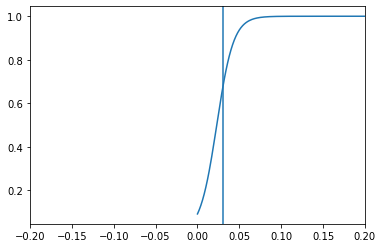

In [28]:
# relative_x_velocities

pd.DataFrame(relative_x_velocities).hist(bins=50)
plt.axvline(x=0.01)
plt.axvline(x=0.02)
plt.xlim(-0.2, 0.2)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=80)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.01)
plt.axvline(x=0.03)
plt.show()

# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

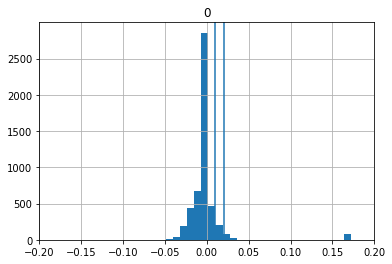

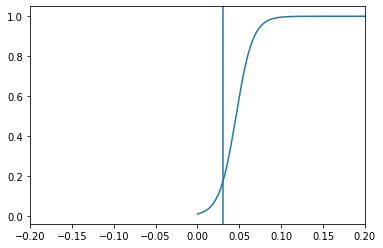

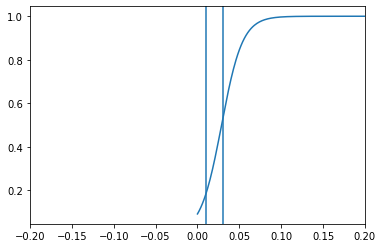

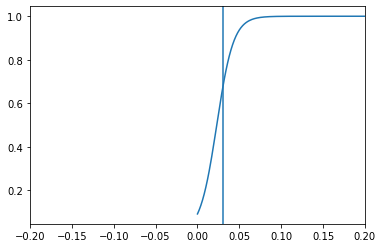

In [29]:
# relative_y_velocities

pd.DataFrame(relative_y_velocities).hist(bins=50)
plt.axvline(x=0.01)
plt.axvline(x=0.02)
plt.xlim(-0.2, 0.2)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=80)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.01)
plt.axvline(x=0.03)
plt.show()

# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

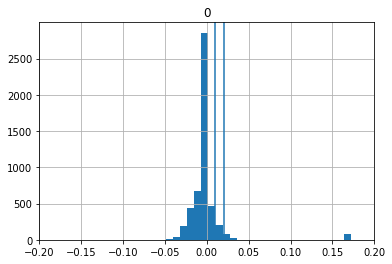

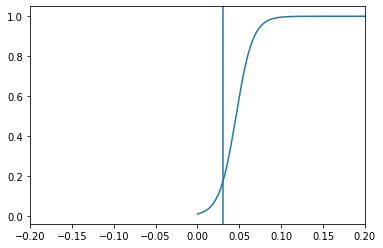

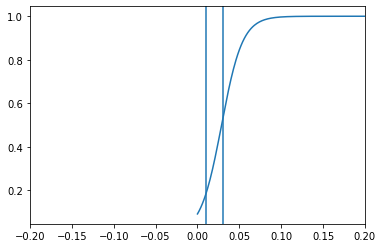

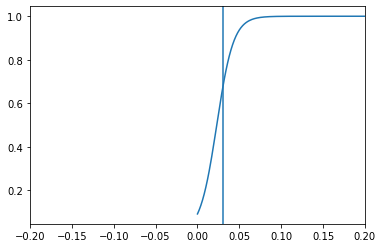

In [30]:
# relative_z_velocities

pd.DataFrame(relative_y_velocities).hist(bins=50)
plt.axvline(x=0.01)
plt.axvline(x=0.02)
plt.xlim(-0.2, 0.2)
plt.show()

# state 0
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=100, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()

# state 1
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=80)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.01)
plt.axvline(x=0.03)
plt.show()

# state 2
x = np.arange(0, 0.25, 0.001)
y = sigmoid(x, q=10, beta=100)
plt.plot(x, y)
plt.xlim(-0.2, 0.2)
plt.axvline(x=0.03)
plt.show()